In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics.cluster import pair_confusion_matrix
import warnings

warnings.filterwarnings('ignore')
random_state = 42
filename = './datasets/exam_2021_01_27.csv'
separator = ','
%matplotlib inline
np.random.seed(random_state)

# 1

In [25]:
df = pd.read_csv(filename, sep=separator, header=None)
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
df.head()


Dataset with 150 rows and 5 columns


,0,1,2,3,4
0,NaN,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [26]:
df.describe()

,0,1,3,4
count,140.000000,140.000000,137.000000,150.000000
mean,5.903571,3.036429,1.290511,1.000000
std,0.820371,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.850000,3.000000,1.400000,1.000000
75%,6.425000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


# 2

In [27]:
print(f'Dropping {df.isna().sum().sum()} rows with NaN values')
df = df.dropna()
print(f'Dataset with {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dropping 33 rows with NaN values
Dataset with 122 rows and 5 columns


,0,1,2,3,4
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0


# 3

In [29]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df[2] = oe.fit_transform(df[[2]])
df.head()

,0,1,2,3,4
4,5.0,3.6,0.0,0.2,0
7,5.0,3.4,0.0,0.2,0
10,5.4,3.7,0.0,0.2,0
11,4.8,3.4,0.0,0.2,0
13,4.3,3.0,0.0,0.1,0


# 4

In [32]:
X = df.drop(columns=[4], axis=1)
y = df[4]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# 5, 6, 7

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid_dt = {
    'max_depth': list(range(1, 22)),
    'random_state': [random_state]
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1);
grid_dt.fit(X_train, y_train);
print(f'Best parameters: {grid_dt.best_params_}')

Best parameters: {'max_depth': 2, 'random_state': 42}


Accuracy on test set: 84.00%


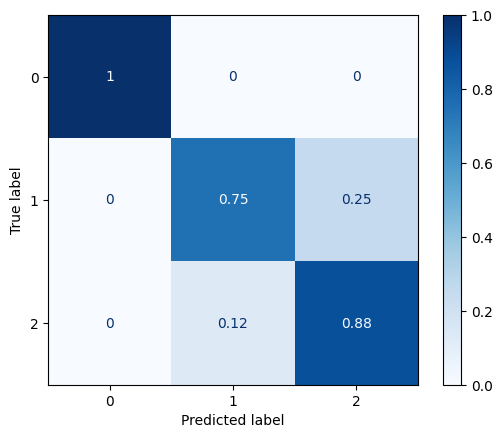

In [56]:
dt = grid_dt.best_estimator_
print(f'Accuracy on test set: {dt.score(X_test, y_test)*100:.2f}%')

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues, normalize='true');

# 8, 9

In [55]:
from sklearn.linear_model import Perceptron

param_grid_lp = {
    'early_stopping': [True],
    'eta0': [0.1, 0.01, 0.001],
    'random_state': [random_state]
}

lp = Perceptron()
grid_lp = GridSearchCV(lp, param_grid_lp, cv=5, scoring='accuracy', n_jobs=-1);
grid_lp.fit(X_train, y_train);
print(f'Best parameters: {grid_lp.best_params_}')

Best parameters: {'early_stopping': True, 'eta0': 0.1, 'random_state': 42}


Accuracy on test set: 60.00%


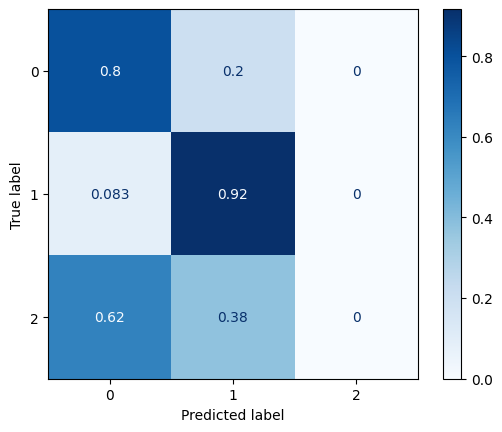

In [57]:
lp = grid_lp.best_estimator_
print(f'Accuracy on test set: {lp.score(X_test, y_test)*100:.2f}%')
plot_confusion_matrix(lp, X_test, y_test, cmap=plt.cm.Blues, normalize='true');